# **Neural Networks implemented in Python's Tensor flow**

## **Part 2, basic algorithms:**

### **Section 1, Linear Regression:**

    Lets import Tensorflow & Numpy again

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf

    For this section we will also need Tf Keras

In [38]:
from tensorflow import keras # type: ignore
from tensorflow.keras import layers # type: ignore
import tensorflow.compat.v2.feature_column as fc # type: ignore
import tensorflow.compat.v1 as tf1 # type: ignore

    As well as PyPlot & SciKit Learn

In [26]:
import matplotlib.pyplot as plt
import sklearn

    Here is some sample data to make a simple Linear Regression on

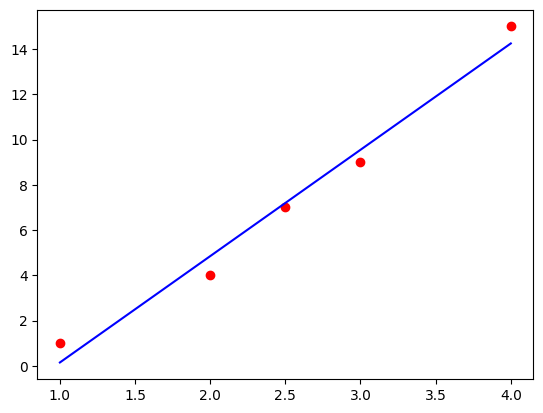

In [27]:
x = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]
plt.plot(x, y, 'ro');   coefficients = np.polyfit(x, y, 1); polynomial = np.poly1d(coefficients)
line_of_best_fit = polynomial(x);   plt.plot(x, line_of_best_fit, 'b-')

    lets load our dataset for today

In [28]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dftest = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')

dftrain.head(); dftest.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,35.0,0,0,8.0500,Third,unknown,Southampton,y
1,0,male,54.0,0,0,51.8625,First,E,Southampton,y
2,1,female,58.0,0,0,26.5500,First,C,Southampton,y
3,1,female,55.0,0,0,16.0000,Second,unknown,Southampton,y
4,1,male,34.0,0,0,13.0000,Second,D,Southampton,y


In [29]:
ytrain = pd.DataFrame(dftrain); ytrain = ytrain.pop('survived')
ytest = pd.DataFrame(dftest); ytest = ytest.pop('survived')

ytrain.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [30]:
categorical = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck', 'embark_town', 'alone']; numerical = ['age', 'fare']

    don't forget to normalize the data

In [75]:
survived = np.array(dftrain[numerical])

survival_normalizer = layers.Normalization(input_shape=[1,], axis=None)
survival_normalizer.adapt(survived)


C:\Users\samia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### **Now, lets train:**

    we can create the model using the normalized dataset

In [76]:
survival_model = tf.keras.Sequential([
    survival_normalizer,
    layers.Dense(units=1)
])

survival_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_18                │ (None, 1)              │             3 │
│ (Normalization)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5 (24.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 3 (16.00 B)

    now that we have the model, lets configure the training process & optimize for minimum mse

In [78]:
survival_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

history = survival_model.fit(
    dftrain[numerical],
    ytrain,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_5" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (None, 2)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 2), dtype=float32)
  • training=True
  • mask=None

    lets use this to predict a few entries

In [72]:
print(survival_model.predict(ytest[:15]))
print(ytest[:15])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
[[1.0261948 ]
 [1.0261948 ]
 [0.99413466]
 [0.99413466]
 [0.99413466]
 [0.99413466]
 [1.0261948 ]
 [1.0261948 ]
 [1.0261948 ]
 [0.99413466]
 [0.99413466]
 [1.0261948 ]
 [0.99413466]
 [1.0261948 ]
 [0.99413466]]
0     0
1     0
2     1
3     1
4     1
5     1
6     0
7     0
8     0
9     1
10    1
11    0
12    1
13    0
14    1
Name: survived, dtype: int64


In [51]:
# dump:

def make_input_func(data_df, label_df, num_epoch=10, shuffle=True, batch_size=32):
    def input_func():
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df)) # using a dict to object cast the df into its type
        if shuffle:
            ds = ds.shuffle(1000) # we shuffle
        ds = ds.batch(batch_size).repeat(num_epoch)
        return ds
    return input_func

train_input_fn = make_input_func(dftrain, ytrain)
test_input_fn = make_input_func(dftest, ytest, num_epoch=1, shuffle=False)




dataset = train_input_fn()
eval_dataset = test_input_fn()
